Training and evaluating SVC...
Test Accuracy for SVC: 0.80
Classification Report for SVC (Testing Set):
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       882
           1       0.99      0.93      0.96       913
           2       0.70      0.74      0.72       905

    accuracy                           0.80      2700
   macro avg       0.80      0.80      0.80      2700
weighted avg       0.80      0.80      0.80      2700



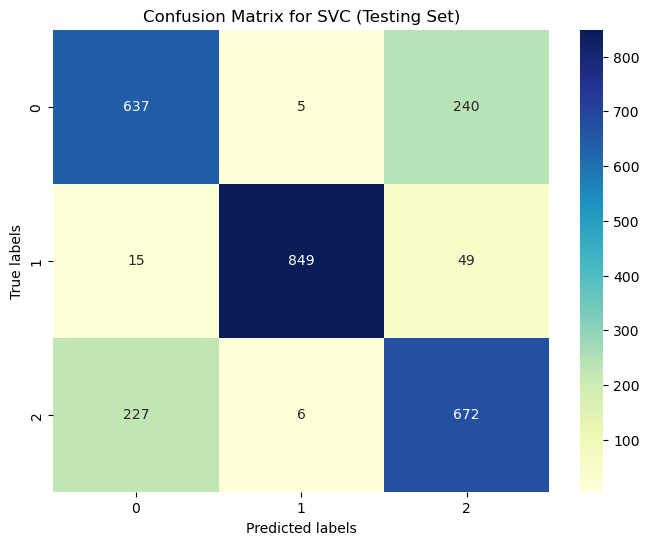

Training and evaluating LogisticRegression...


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy for LogisticRegression: 0.79
Classification Report for LogisticRegression (Testing Set):
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       882
           1       0.97      0.92      0.95       913
           2       0.69      0.73      0.71       905

    accuracy                           0.79      2700
   macro avg       0.79      0.79      0.79      2700
weighted avg       0.79      0.79      0.79      2700



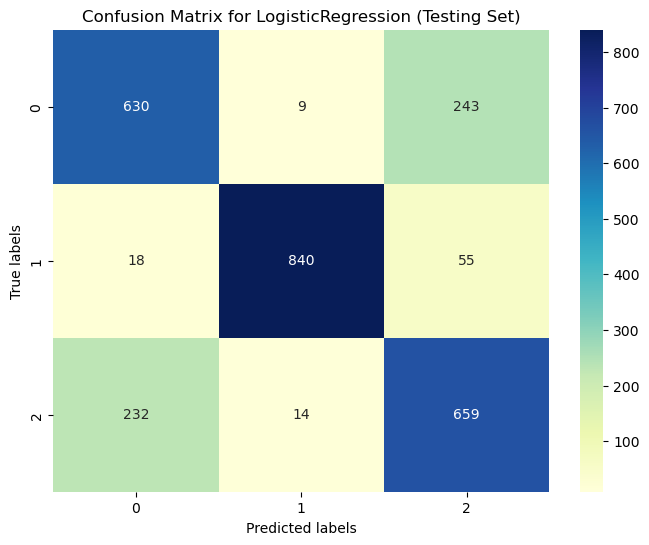

Training and evaluating DecisionTreeClassifier...
Test Accuracy for DecisionTreeClassifier: 0.77
Classification Report for DecisionTreeClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       882
           1       0.97      0.94      0.95       913
           2       0.67      0.68      0.68       905

    accuracy                           0.77      2700
   macro avg       0.77      0.76      0.77      2700
weighted avg       0.77      0.77      0.77      2700



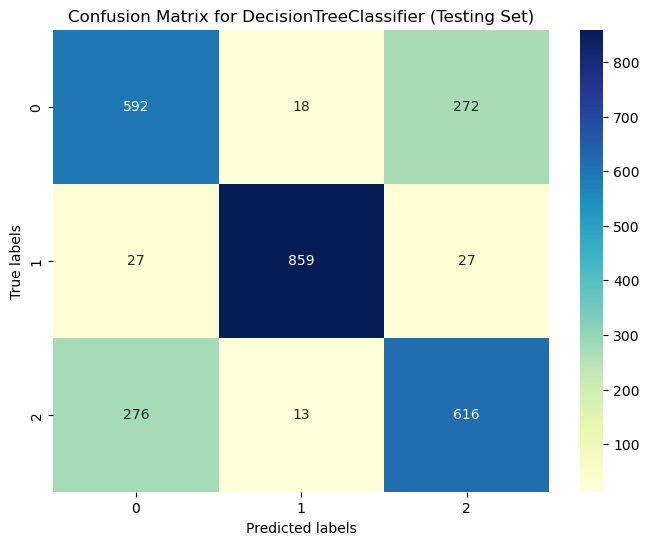

Training and evaluating RandomForestClassifier...
Test Accuracy for RandomForestClassifier: 0.83
Classification Report for RandomForestClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       882
           1       0.98      0.96      0.97       913
           2       0.76      0.78      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



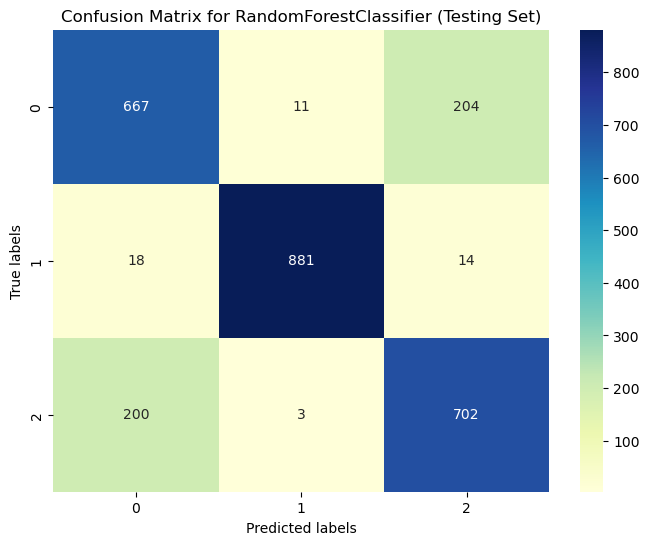

Training and evaluating KNeighborsClassifier...
Test Accuracy for KNeighborsClassifier: 0.80
Classification Report for KNeighborsClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       882
           1       0.97      0.94      0.96       913
           2       0.70      0.75      0.73       905

    accuracy                           0.80      2700
   macro avg       0.80      0.79      0.79      2700
weighted avg       0.80      0.80      0.80      2700



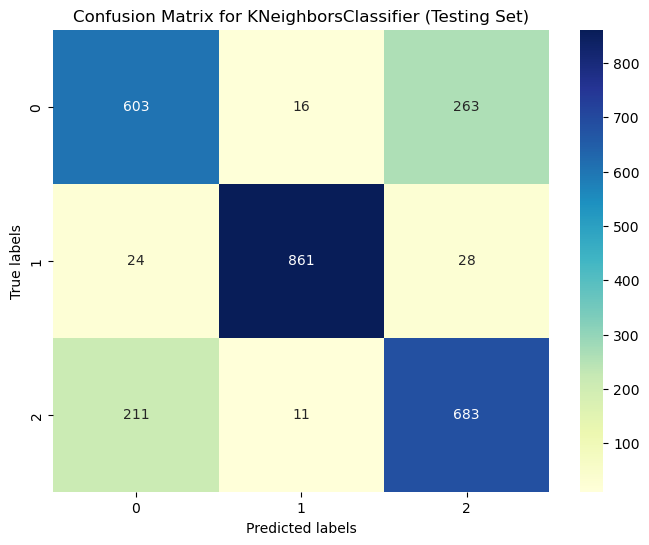

Training and evaluating XGBClassifier...
Test Accuracy for XGBClassifier: 0.83
Classification Report for XGBClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       882
           1       0.98      0.96      0.97       913
           2       0.76      0.78      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.84      0.83      0.84      2700



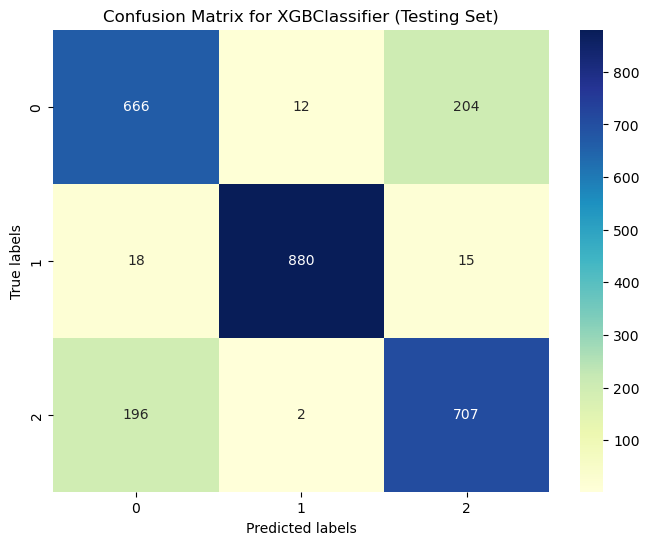

Training and evaluating AdaBoostClassifier...
Test Accuracy for AdaBoostClassifier: 0.76
Classification Report for AdaBoostClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       882
           1       0.97      0.92      0.94       913
           2       0.66      0.70      0.68       905

    accuracy                           0.76      2700
   macro avg       0.76      0.76      0.76      2700
weighted avg       0.76      0.76      0.76      2700



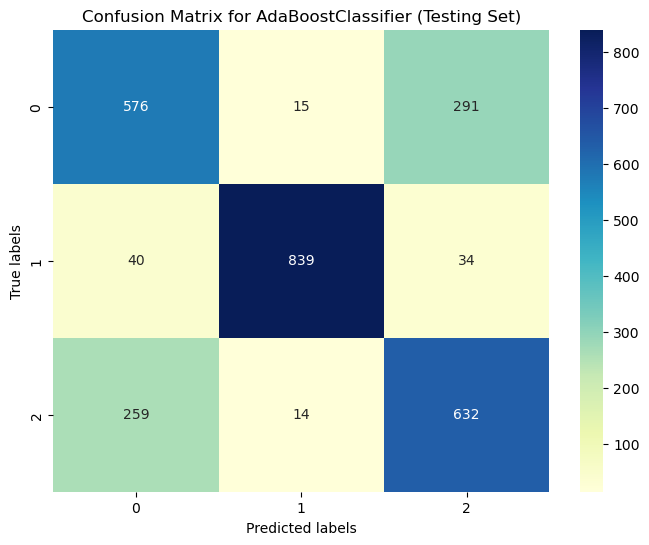

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_path):
    data = pd.read_csv(file_path)  # Assuming CSV format
    X = data.iloc[:, :-1]  # Assuming last column is the target
    y = data.iloc[:, -1]   # Assuming last column is the target
    return X, y

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    # Training the classifier
    classifier.fit(X_train, y_train)

    # Predictions on the testing set
    y_test_pred = classifier.predict(X_test)

    # Accuracy on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {type(classifier).__name__}: {test_accuracy:.2f}")

    # Classification report on testing set
    print(f"Classification Report for {type(classifier).__name__} (Testing Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix on testing set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {type(classifier).__name__} (Testing Set)')
    plt.show()

# Load data
file_path = "FINAL CSV.csv"
X, y = load_data(file_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Train and evaluate each classifier
for classifier in classifiers:
    print(f"Training and evaluating {type(classifier).__name__}...")
    train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test)


Training Accuracy: 1.0
Test Accuracy: 0.8322222222222222
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.73      0.81      0.76       882
   MALIGNANT       0.98      0.96      0.97       913
      NORMAL       0.79      0.72      0.76       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.84      0.83      0.83      2700



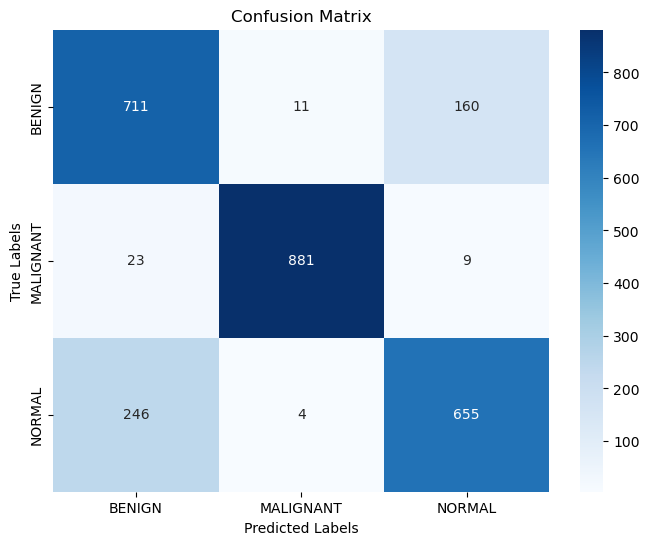

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Define classifiers
classifiers = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='hard')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.9873015873015873
Test Accuracy: 0.8322222222222222
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.76      0.74      0.75       882
   MALIGNANT       0.98      0.96      0.97       913
      NORMAL       0.75      0.79      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



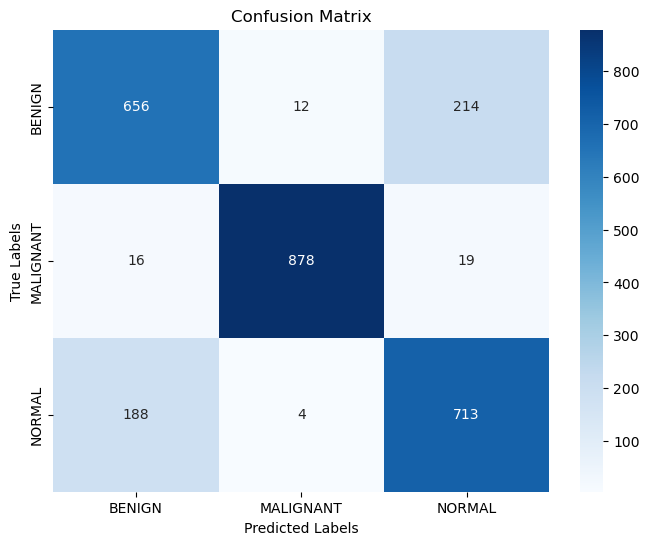

In [6]:

# Define classifiers
classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.981904761904762
Test Accuracy: 0.8396296296296296
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.76      0.77      0.77       882
   MALIGNANT       0.99      0.96      0.97       913
      NORMAL       0.77      0.78      0.78       905

    accuracy                           0.84      2700
   macro avg       0.84      0.84      0.84      2700
weighted avg       0.84      0.84      0.84      2700



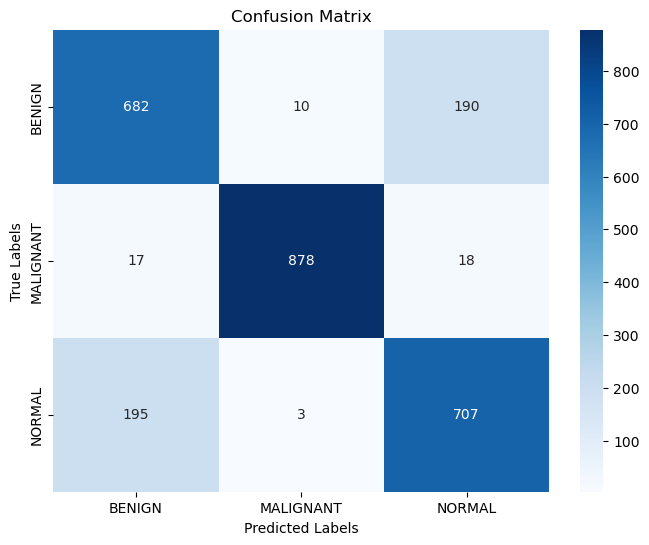

In [14]:

# Define classifiers
classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.9987301587301587
Test Accuracy: 0.8403703703703703
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.77      0.77      0.77       882
   MALIGNANT       0.99      0.96      0.97       913
      NORMAL       0.77      0.79      0.78       905

    accuracy                           0.84      2700
   macro avg       0.84      0.84      0.84      2700
weighted avg       0.84      0.84      0.84      2700



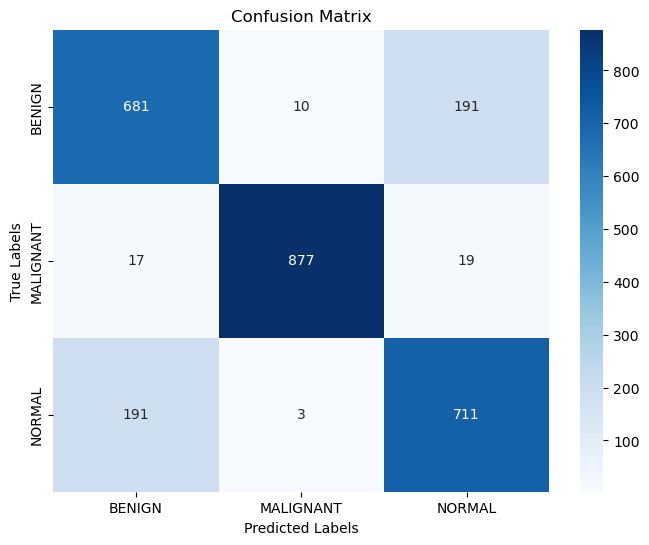

In [13]:

# Define classifiers
classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.953015873015873
Test Accuracy: 0.8262962962962963
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.74      0.76      0.75       882
   MALIGNANT       0.99      0.96      0.97       913
      NORMAL       0.75      0.76      0.76       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



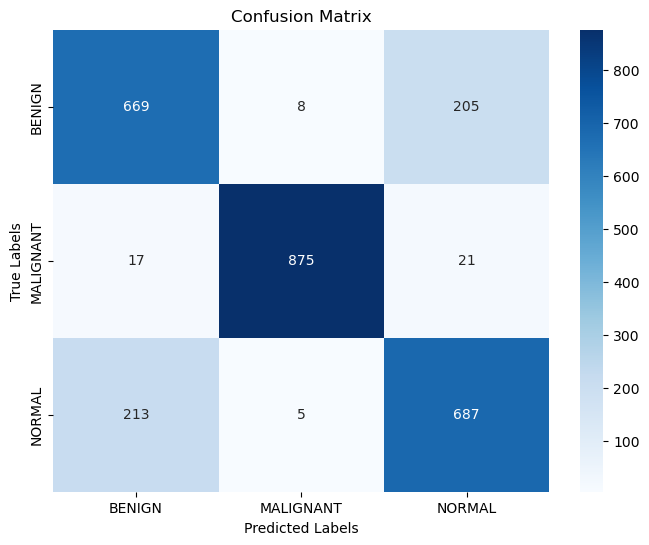

In [9]:

# Define classifiers
classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.8626984126984127
Test Accuracy: 0.817037037037037
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.75      0.72      0.73       882
   MALIGNANT       0.98      0.95      0.96       913
      NORMAL       0.73      0.78      0.75       905

    accuracy                           0.82      2700
   macro avg       0.82      0.82      0.82      2700
weighted avg       0.82      0.82      0.82      2700



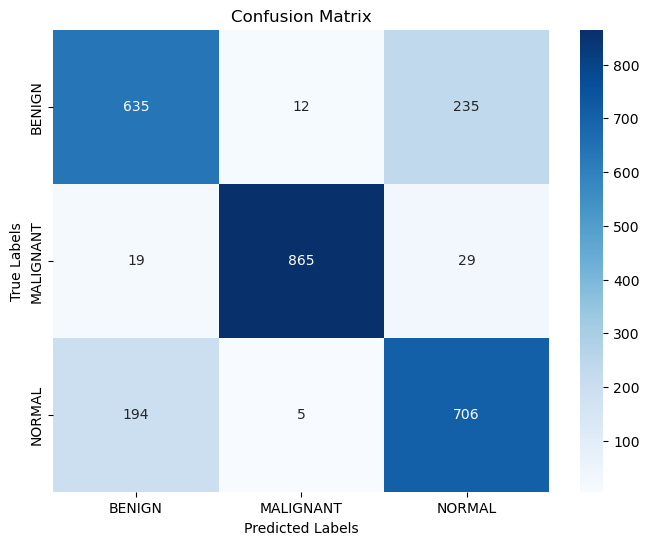

In [10]:

# Define classifiers
classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
   
    ('knn', KNeighborsClassifier())
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy: 0.9995238095238095
Test Accuracy: 0.8340740740740741
Classification Report (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.76      0.74      0.75       882
   MALIGNANT       0.98      0.96      0.97       913
      NORMAL       0.76      0.79      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.84      0.83      0.83      2700



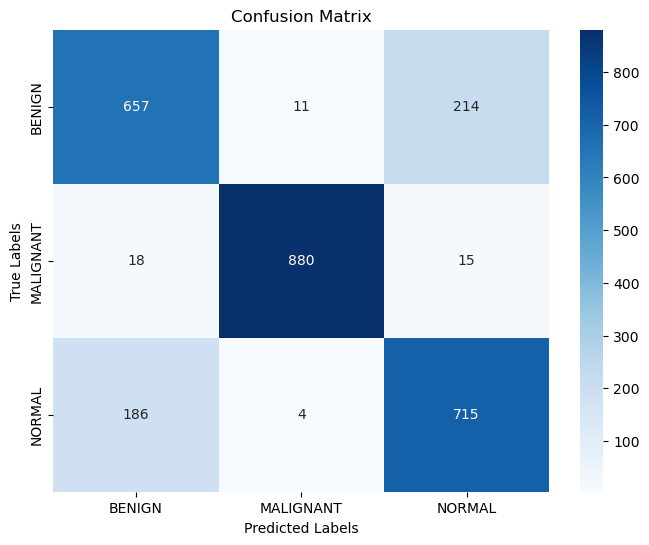

In [11]:

# Define classifiers
classifiers = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create ensemble classifier
ensemble_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

# Predictions
y_pred_train = ensemble_clf.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on test set
y_pred_test = ensemble_clf.predict(X_test)

# Evaluate test set performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Classification report on test set
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training and evaluating SVC...
Test Accuracy for SVC: 0.78
Classification Report for SVC (Testing Set):
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       882
           1       0.95      0.93      0.94       913
           2       0.69      0.72      0.70       905

    accuracy                           0.78      2700
   macro avg       0.78      0.78      0.78      2700
weighted avg       0.78      0.78      0.78      2700



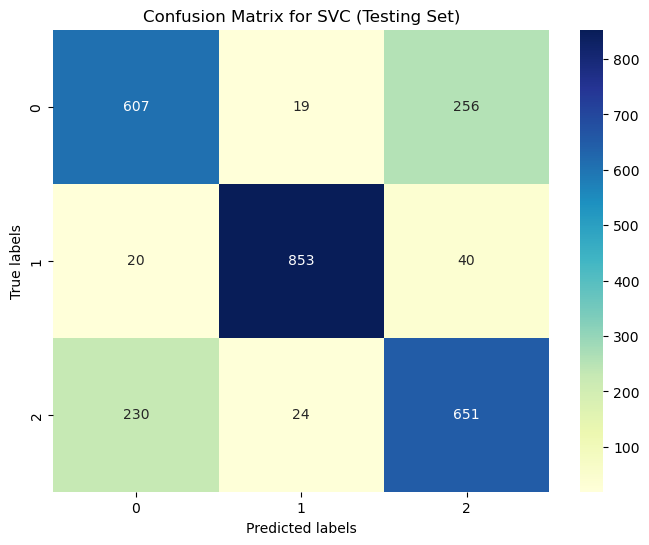

Training and evaluating LogisticRegression...


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy for LogisticRegression: 0.77
Classification Report for LogisticRegression (Testing Set):
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       882
           1       0.94      0.92      0.93       913
           2       0.68      0.69      0.68       905

    accuracy                           0.77      2700
   macro avg       0.77      0.77      0.77      2700
weighted avg       0.77      0.77      0.77      2700



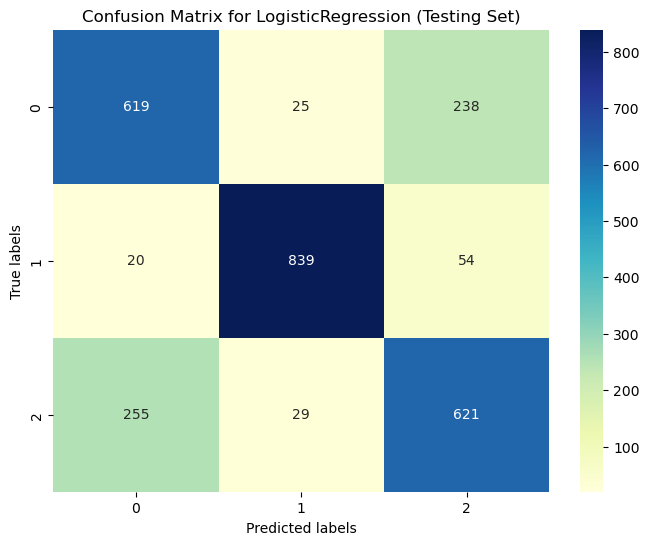

Training and evaluating DecisionTreeClassifier...
Test Accuracy for DecisionTreeClassifier: 0.76
Classification Report for DecisionTreeClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       882
           1       0.95      0.92      0.94       913
           2       0.67      0.66      0.66       905

    accuracy                           0.76      2700
   macro avg       0.76      0.75      0.76      2700
weighted avg       0.76      0.76      0.76      2700



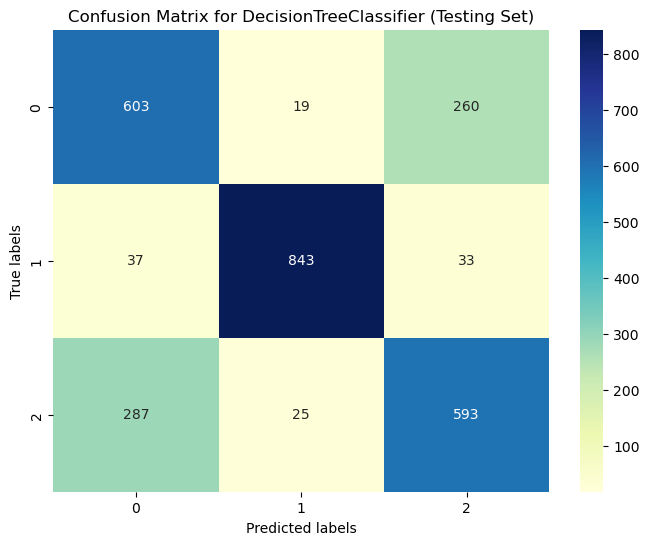

Training and evaluating RandomForestClassifier...
Test Accuracy for RandomForestClassifier: 0.82
Classification Report for RandomForestClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       882
           1       0.96      0.97      0.96       913
           2       0.76      0.74      0.75       905

    accuracy                           0.82      2700
   macro avg       0.82      0.82      0.82      2700
weighted avg       0.82      0.82      0.82      2700



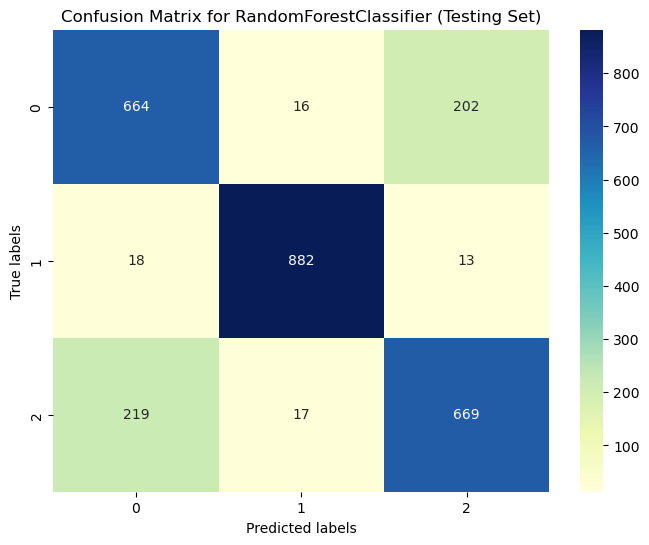

Training and evaluating KNeighborsClassifier...
Test Accuracy for KNeighborsClassifier: 0.79
Classification Report for KNeighborsClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       882
           1       0.97      0.94      0.96       913
           2       0.70      0.75      0.73       905

    accuracy                           0.79      2700
   macro avg       0.80      0.79      0.79      2700
weighted avg       0.80      0.79      0.79      2700



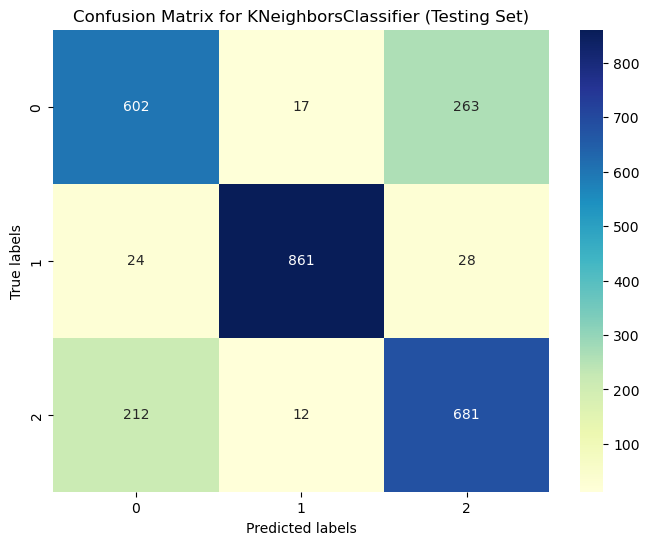

Training and evaluating XGBClassifier...
Test Accuracy for XGBClassifier: 0.83
Classification Report for XGBClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       882
           1       0.98      0.96      0.97       913
           2       0.75      0.77      0.76       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



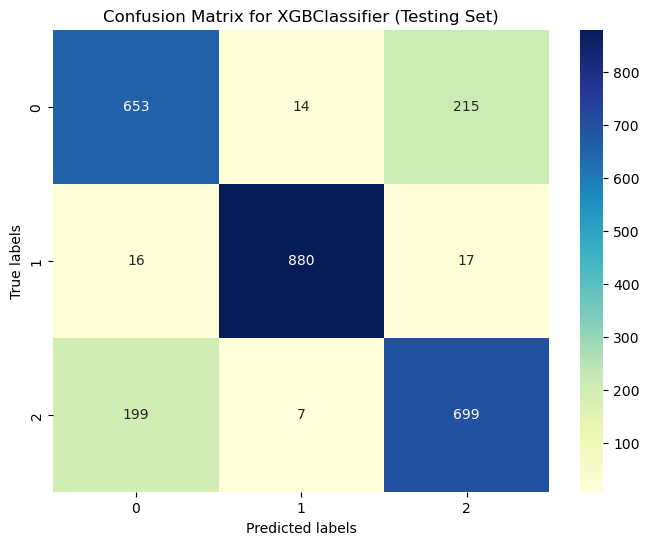

Training and evaluating AdaBoostClassifier...
Test Accuracy for AdaBoostClassifier: 0.74
Classification Report for AdaBoostClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       882
           1       0.93      0.89      0.91       913
           2       0.66      0.60      0.63       905

    accuracy                           0.74      2700
   macro avg       0.74      0.74      0.74      2700
weighted avg       0.74      0.74      0.74      2700



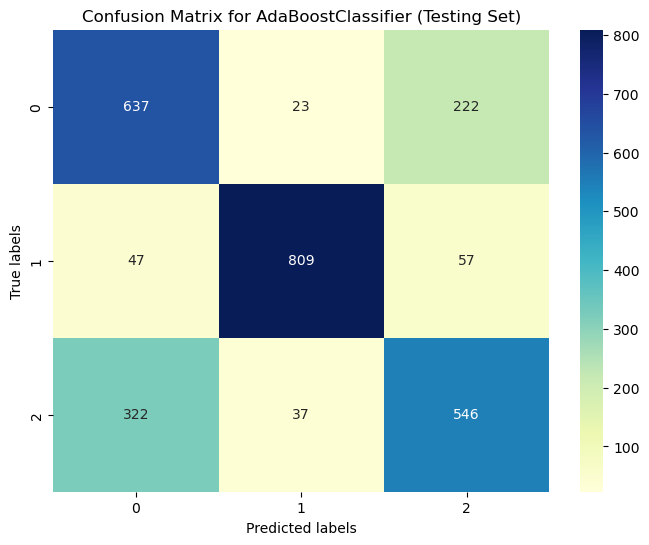

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_path):
    data = pd.read_csv(file_path)  # Assuming CSV format
    X = data.iloc[:, :-1]  # Assuming last column is the target
    y = data.iloc[:, -1]   # Assuming last column is the target
    return X, y

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    # Training the classifier
    classifier.fit(X_train, y_train)

    # Predictions on the testing set
    y_test_pred = classifier.predict(X_test)

    # Accuracy on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {type(classifier).__name__}: {test_accuracy:.2f}")

    # Classification report on testing set
    print(f"Classification Report for {type(classifier).__name__} (Testing Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix on testing set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {type(classifier).__name__} (Testing Set)')
    plt.show()

# Load data
file_path = "FINAL CSV.csv"
X, y = load_data(file_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=20)  # Adjust 'n_components' as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Train and evaluate each classifier
for classifier in classifiers:
    print(f"Training and evaluating {type(classifier).__name__}...")
    train_and_evaluate_classifier(classifier, X_train_pca, X_test_pca, y_train, y_test)


Training and evaluating SVC...
Test Accuracy for SVC: 0.68
Classification Report for SVC (Testing Set):
              precision    recall  f1-score   support

           0       0.53      0.85      0.65       882
           1       0.96      0.94      0.95       913
           2       0.58      0.26      0.36       905

    accuracy                           0.68      2700
   macro avg       0.69      0.68      0.65      2700
weighted avg       0.69      0.68      0.65      2700



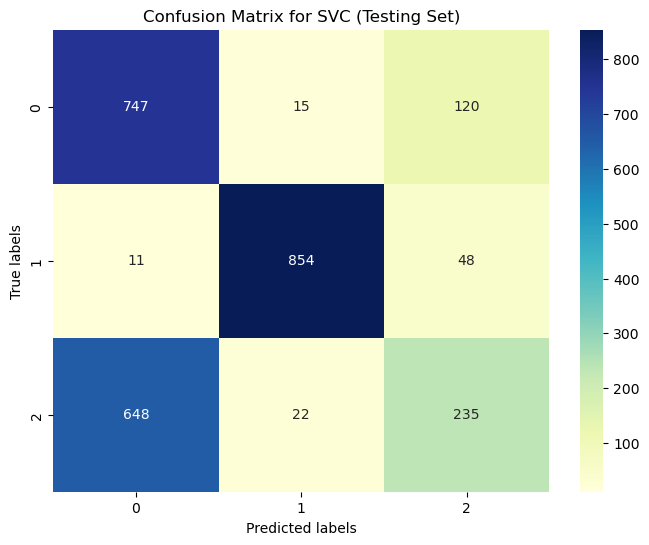

Training and evaluating LogisticRegression...
Test Accuracy for LogisticRegression: 0.69
Classification Report for LogisticRegression (Testing Set):
              precision    recall  f1-score   support

           0       0.55      0.72      0.62       882
           1       0.96      0.93      0.95       913
           2       0.57      0.42      0.48       905

    accuracy                           0.69      2700
   macro avg       0.69      0.69      0.68      2700
weighted avg       0.70      0.69      0.69      2700



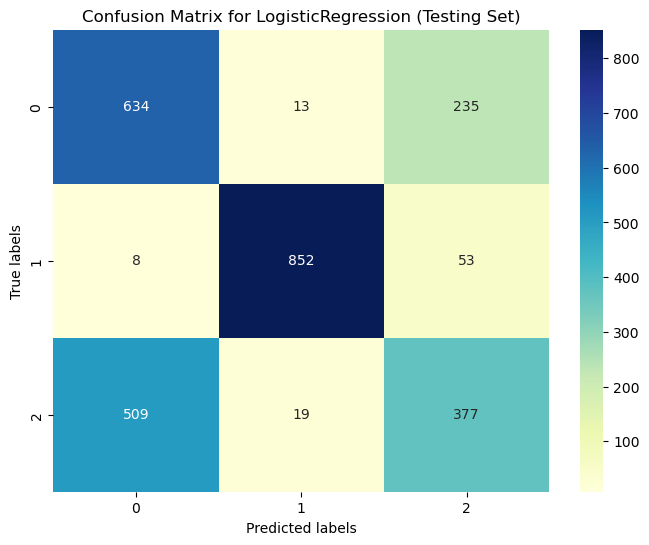

Training and evaluating DecisionTreeClassifier...
Test Accuracy for DecisionTreeClassifier: 0.62
Classification Report for DecisionTreeClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       882
           1       0.92      0.91      0.91       913
           2       0.47      0.46      0.46       905

    accuracy                           0.62      2700
   macro avg       0.63      0.62      0.62      2700
weighted avg       0.63      0.62      0.63      2700



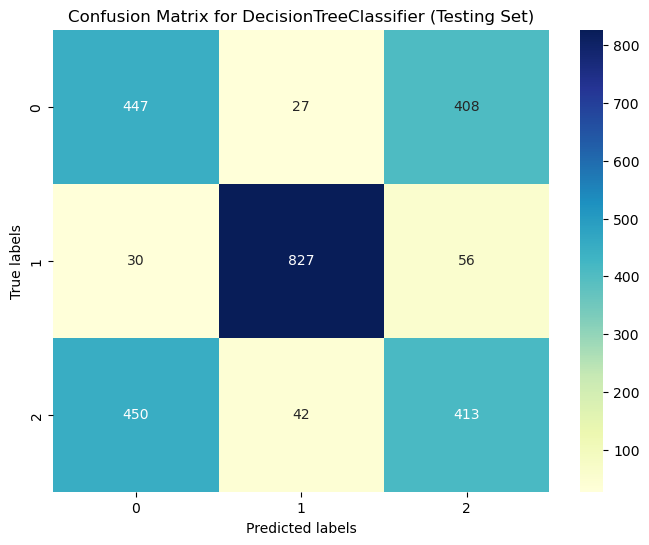

Training and evaluating RandomForestClassifier...
Test Accuracy for RandomForestClassifier: 0.63
Classification Report for RandomForestClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       882
           1       0.93      0.91      0.92       913
           2       0.47      0.46      0.47       905

    accuracy                           0.63      2700
   macro avg       0.63      0.62      0.62      2700
weighted avg       0.63      0.63      0.63      2700



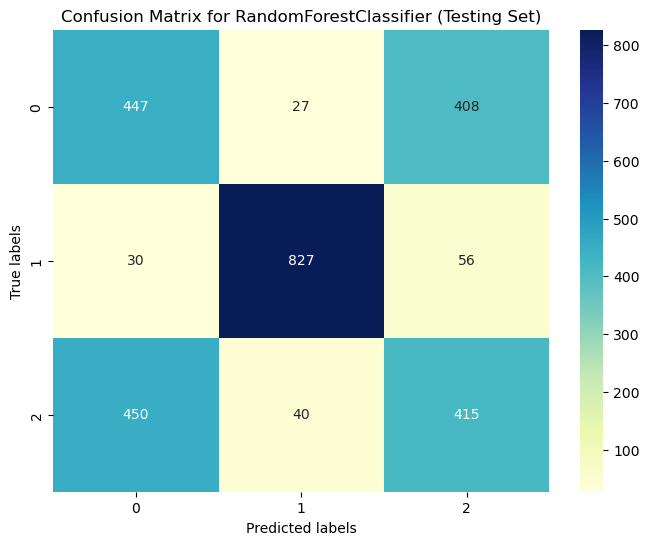

Training and evaluating KNeighborsClassifier...
Test Accuracy for KNeighborsClassifier: 0.65
Classification Report for KNeighborsClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       882
           1       0.95      0.92      0.94       913
           2       0.49      0.49      0.49       905

    accuracy                           0.65      2700
   macro avg       0.65      0.64      0.65      2700
weighted avg       0.65      0.65      0.65      2700



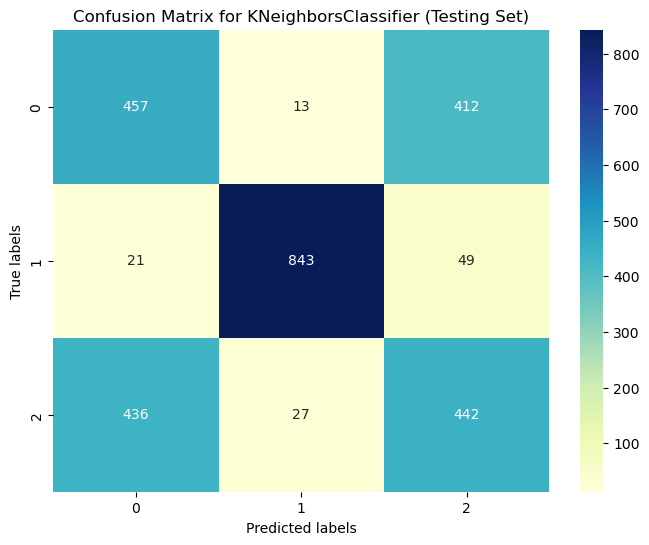

Training and evaluating XGBClassifier...
Test Accuracy for XGBClassifier: 0.68
Classification Report for XGBClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       882
           1       0.96      0.93      0.95       913
           2       0.54      0.53      0.53       905

    accuracy                           0.68      2700
   macro avg       0.68      0.68      0.68      2700
weighted avg       0.69      0.68      0.68      2700



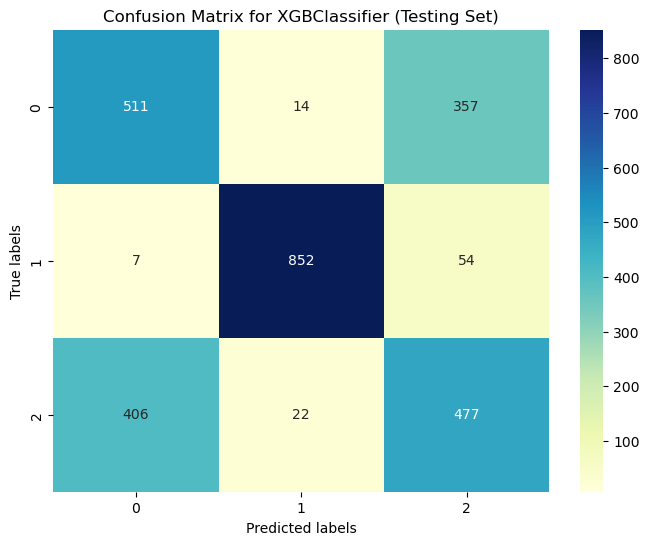

Training and evaluating AdaBoostClassifier...
Test Accuracy for AdaBoostClassifier: 0.69
Classification Report for AdaBoostClassifier (Testing Set):
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       882
           1       0.98      0.91      0.95       913
           2       0.54      0.55      0.54       905

    accuracy                           0.69      2700
   macro avg       0.70      0.69      0.69      2700
weighted avg       0.70      0.69      0.69      2700



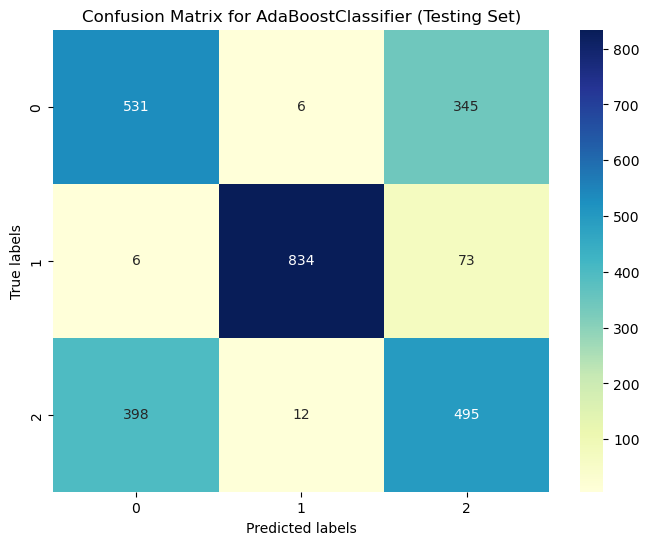

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_path):
    data = pd.read_csv(file_path)  # Assuming CSV format
    X = data.iloc[:, :-1]  # Assuming last column is the target
    y = data.iloc[:, -1]   # Assuming last column is the target
    return X, y

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    # Training the classifier
    classifier.fit(X_train, y_train)

    # Predictions on the testing set
    y_test_pred = classifier.predict(X_test)

    # Accuracy on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {type(classifier).__name__}: {test_accuracy:.2f}")

    # Classification report on testing set
    print(f"Classification Report for {type(classifier).__name__} (Testing Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix on testing set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {type(classifier).__name__} (Testing Set)')
    plt.show()

# Load data
file_path = "FINAL CSV.csv"
X, y = load_data(file_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA
lda = LDA(n_components=1)  # Adjust 'n_components' as needed; maximum is min(n_classes - 1, n_features)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Initialize classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Train and evaluate each classifier
for classifier in classifiers:
    print(f"Training and evaluating {type(classifier).__name__}...")
    train_and_evaluate_classifier(classifier, X_train_lda, X_test_lda, y_train, y_test)


Training and evaluating SVC...
Test Accuracy for SVC: 0.80
Classification Report for SVC (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.72      0.72      0.72       882
   MALIGNANT       0.99      0.93      0.96       913
      NORMAL       0.70      0.74      0.72       905

    accuracy                           0.80      2700
   macro avg       0.80      0.80      0.80      2700
weighted avg       0.80      0.80      0.80      2700



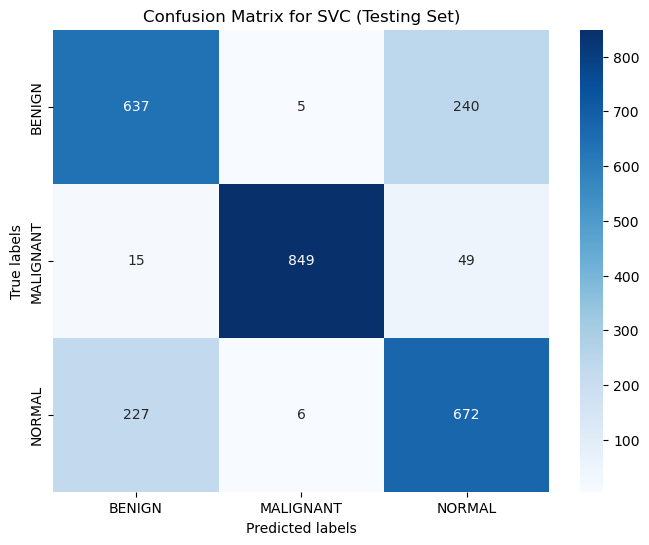

Training and evaluating LogisticRegression...


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy for LogisticRegression: 0.79
Classification Report for LogisticRegression (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.72      0.71      0.72       882
   MALIGNANT       0.97      0.92      0.95       913
      NORMAL       0.69      0.73      0.71       905

    accuracy                           0.79      2700
   macro avg       0.79      0.79      0.79      2700
weighted avg       0.79      0.79      0.79      2700



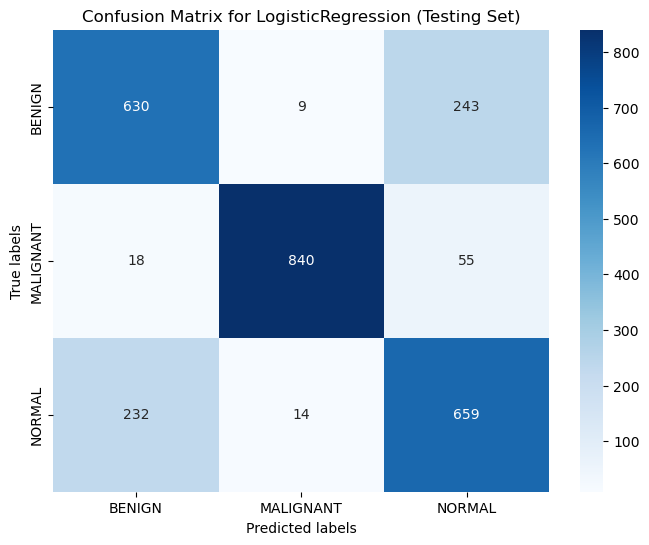

Training and evaluating DecisionTreeClassifier...
Test Accuracy for DecisionTreeClassifier: 0.77
Classification Report for DecisionTreeClassifier (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.66      0.67      0.67       882
   MALIGNANT       0.97      0.94      0.95       913
      NORMAL       0.67      0.68      0.68       905

    accuracy                           0.77      2700
   macro avg       0.77      0.76      0.77      2700
weighted avg       0.77      0.77      0.77      2700



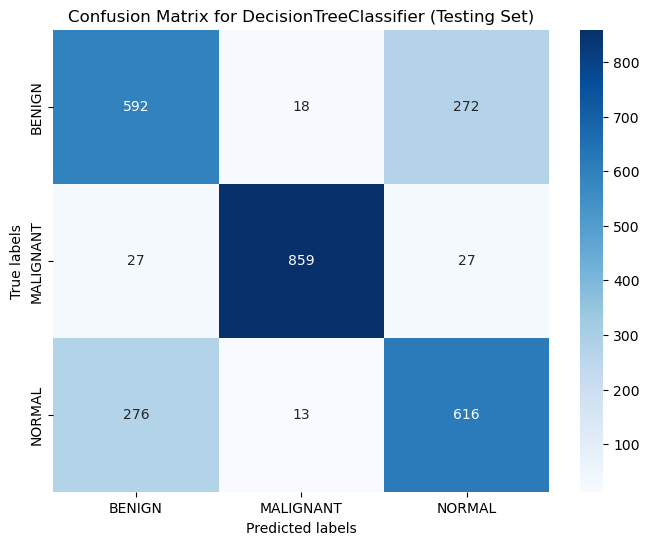

Training and evaluating RandomForestClassifier...
Test Accuracy for RandomForestClassifier: 0.83
Classification Report for RandomForestClassifier (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.75      0.76      0.75       882
   MALIGNANT       0.98      0.96      0.97       913
      NORMAL       0.76      0.78      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.83      0.83      0.83      2700



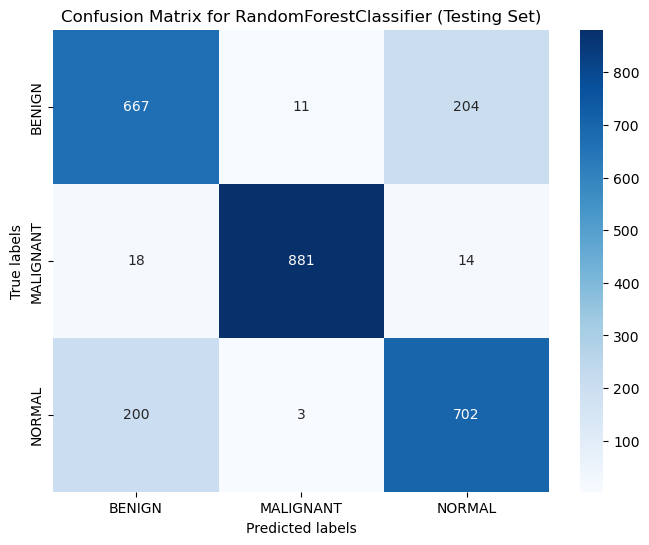

Training and evaluating KNeighborsClassifier...
Test Accuracy for KNeighborsClassifier: 0.80
Classification Report for KNeighborsClassifier (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.72      0.68      0.70       882
   MALIGNANT       0.97      0.94      0.96       913
      NORMAL       0.70      0.75      0.73       905

    accuracy                           0.80      2700
   macro avg       0.80      0.79      0.79      2700
weighted avg       0.80      0.80      0.80      2700



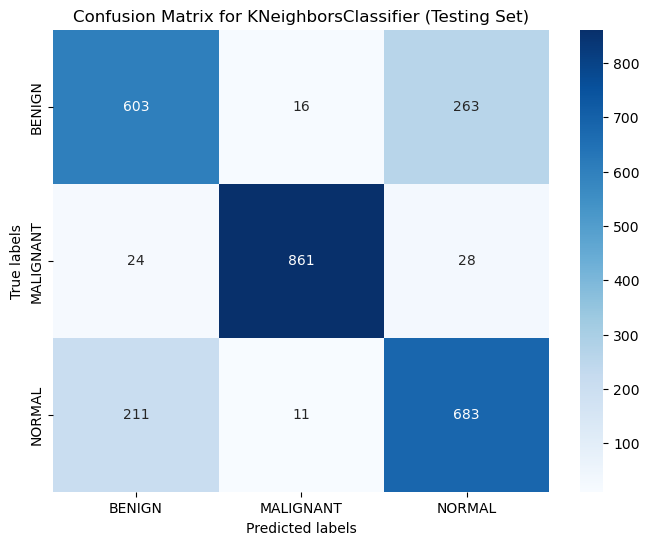

Training and evaluating XGBClassifier...
Test Accuracy for XGBClassifier: 0.83
Classification Report for XGBClassifier (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.76      0.76      0.76       882
   MALIGNANT       0.98      0.96      0.97       913
      NORMAL       0.76      0.78      0.77       905

    accuracy                           0.83      2700
   macro avg       0.83      0.83      0.83      2700
weighted avg       0.84      0.83      0.84      2700



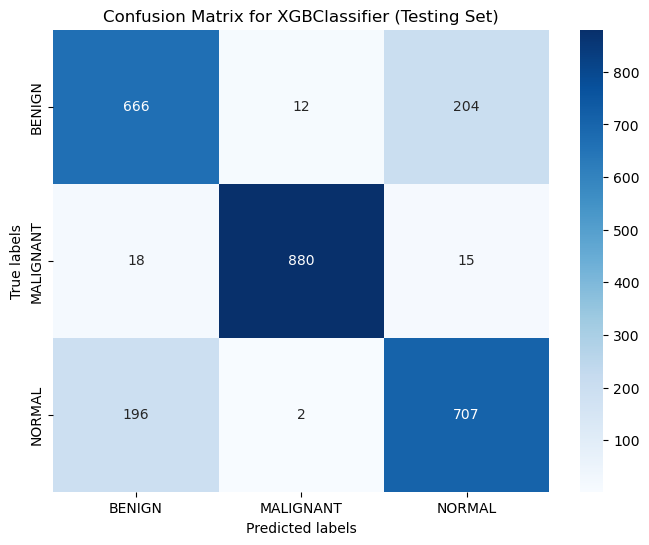

Training and evaluating AdaBoostClassifier...
Test Accuracy for AdaBoostClassifier: 0.76
Classification Report for AdaBoostClassifier (Testing Set):
              precision    recall  f1-score   support

      BENIGN       0.66      0.65      0.66       882
   MALIGNANT       0.97      0.92      0.94       913
      NORMAL       0.66      0.70      0.68       905

    accuracy                           0.76      2700
   macro avg       0.76      0.76      0.76      2700
weighted avg       0.76      0.76      0.76      2700



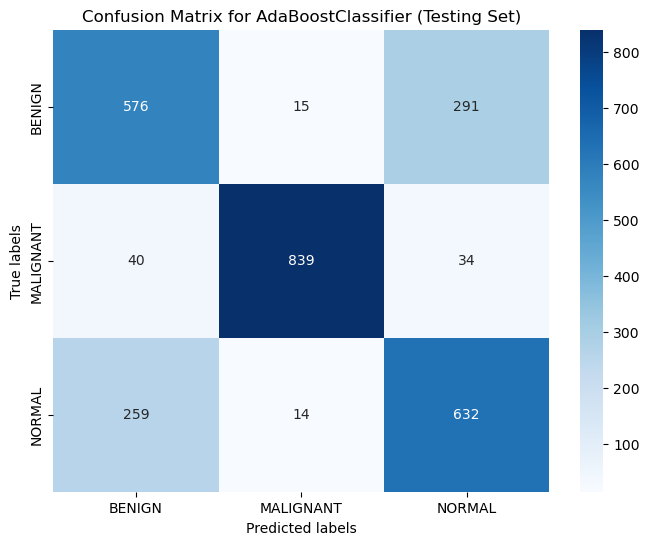

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data from a CSV file
def load_data(file_path):
    data = pd.read_csv(file_path)  # Assuming CSV format
    X = data.iloc[:, :-1]  # Assuming last column is the target
    y = data.iloc[:, -1]   # Assuming last column is the target
    return X, y

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test, class_names):
    # Training the classifier
    classifier.fit(X_train, y_train)

    # Predictions on the testing set
    y_test_pred = classifier.predict(X_test)

    # Accuracy on testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {type(classifier).__name__}: {test_accuracy:.2f}")

    # Classification report on testing set
    print(f"Classification Report for {type(classifier).__name__} (Testing Set):")
    print(classification_report(y_test, y_test_pred, target_names=class_names))

    # Confusion matrix on testing set
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {type(classifier).__name__} (Testing Set)')
    plt.show()

# Load data
file_path = "FINAL CSV.csv"
X, y = load_data(file_path)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_  # Get the original class names

# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Train and evaluate each classifier
for classifier in classifiers:
    print(f"Training and evaluating {type(classifier).__name__}...")
    train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test, class_names)
